<a href="https://colab.research.google.com/github/tushant-akar/CS367-Artifical-Intelligence-Lab/blob/main/Jigsaw_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [6]:
def create_puzzle(N):
    puzzle = np.arange(N * N).reshape((N, N))
    np.random.shuffle(puzzle.flat)
    return puzzle

In [7]:
def calculate_energy(puzzle, N):
    energy = 0
    for i in range(N):
        for j in range(N):
            if j < N - 1:
                energy += abs(puzzle[i, j] - puzzle[i, j + 1])
            if i < N - 1:
                energy += abs(puzzle[i, j] - puzzle[i + 1, j])
    return energy

In [8]:
def simulated_annealing(puzzle, N, max_iterations, initial_temp, cooling_rate):
    current_puzzle = puzzle.copy()
    current_energy = calculate_energy(current_puzzle, N)
    temperature = initial_temp

    for iteration in range(max_iterations):
        i1, j1, i2, j2 = random.randint(0, N - 1), random.randint(0, N - 1), random.randint(0, N - 1), random.randint(0, N - 1)

        new_puzzle = current_puzzle.copy()
        new_puzzle[i1, j1], new_puzzle[i2, j2] = new_puzzle[i2, j2], new_puzzle[i1, j1]

        new_energy = calculate_energy(new_puzzle, N)

        if new_energy < current_energy or random.uniform(0, 1) < math.exp((current_energy - new_energy) / temperature):
            current_puzzle = new_puzzle
            current_energy = new_energy

        temperature *= cooling_rate

        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Energy: {current_energy}")

        if current_energy == 0:
            break

    return current_puzzle

In [9]:
def display_puzzle(puzzle):
    plt.imshow(puzzle, cmap='gray')
    plt.show()

<ipython-input-6-d7eeea5b3f94>:3: UserWarning: you are shuffling a 'flatiter' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(puzzle.flat)


Initial Puzzle:


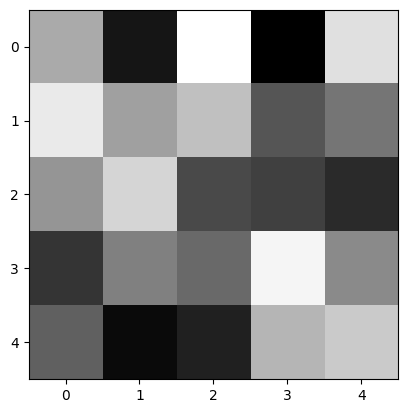

Iteration 0, Energy: 344
Iteration 100, Energy: 193
Iteration 200, Energy: 181
Iteration 300, Energy: 174
Iteration 400, Energy: 172
Iteration 500, Energy: 170
Iteration 600, Energy: 162
Iteration 700, Energy: 159
Iteration 800, Energy: 154
Iteration 900, Energy: 152
Iteration 1000, Energy: 152
Iteration 1100, Energy: 150
Iteration 1200, Energy: 149
Iteration 1300, Energy: 149
Iteration 1400, Energy: 149
Iteration 1500, Energy: 149
Iteration 1600, Energy: 149
Iteration 1700, Energy: 149
Iteration 1800, Energy: 149
Iteration 1900, Energy: 149
Iteration 2000, Energy: 149
Iteration 2100, Energy: 149
Iteration 2200, Energy: 149
Iteration 2300, Energy: 149
Iteration 2400, Energy: 149
Iteration 2500, Energy: 149
Iteration 2600, Energy: 149


<ipython-input-8-9e7b9e2e51b8>:14: RuntimeWarning: overflow encountered in divide
  if new_energy < current_energy or random.uniform(0, 1) < math.exp((current_energy - new_energy) / temperature):
<ipython-input-8-9e7b9e2e51b8>:14: RuntimeWarning: divide by zero encountered in divide
  if new_energy < current_energy or random.uniform(0, 1) < math.exp((current_energy - new_energy) / temperature):
<ipython-input-8-9e7b9e2e51b8>:14: RuntimeWarning: invalid value encountered in divide
  if new_energy < current_energy or random.uniform(0, 1) < math.exp((current_energy - new_energy) / temperature):


Iteration 2700, Energy: 149
Iteration 2800, Energy: 149
Iteration 2900, Energy: 149
Iteration 3000, Energy: 149
Iteration 3100, Energy: 149
Iteration 3200, Energy: 149
Iteration 3300, Energy: 149
Iteration 3400, Energy: 149
Iteration 3500, Energy: 149
Iteration 3600, Energy: 149
Iteration 3700, Energy: 149
Iteration 3800, Energy: 149
Iteration 3900, Energy: 149
Iteration 4000, Energy: 149
Iteration 4100, Energy: 149
Iteration 4200, Energy: 149
Iteration 4300, Energy: 149
Iteration 4400, Energy: 149
Iteration 4500, Energy: 149
Iteration 4600, Energy: 149
Iteration 4700, Energy: 149
Iteration 4800, Energy: 149
Iteration 4900, Energy: 149
Iteration 5000, Energy: 149
Iteration 5100, Energy: 149
Iteration 5200, Energy: 149
Iteration 5300, Energy: 149
Iteration 5400, Energy: 149
Iteration 5500, Energy: 149
Iteration 5600, Energy: 149
Iteration 5700, Energy: 149
Iteration 5800, Energy: 149
Iteration 5900, Energy: 149
Iteration 6000, Energy: 149
Iteration 6100, Energy: 149
Iteration 6200, Ener

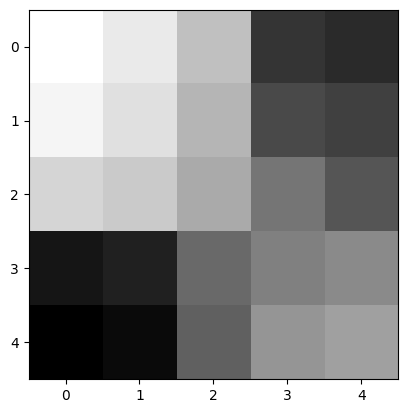

In [10]:
if __name__ == "__main__":
    N = 5
    max_iterations = 10000
    initial_temp = 500
    cooling_rate = 0.45

    puzzle = create_puzzle(N)
    print("Initial Puzzle:")
    display_puzzle(puzzle)

    solved_puzzle = simulated_annealing(puzzle, N, max_iterations, initial_temp, cooling_rate)

    print("Solved Puzzle:")
    display_puzzle(solved_puzzle)